<H2>Data Overview</H2>
In this competition, we need to predict if two people share a kinship relationship or not based on their facial images. The data is provided by Families In the Wild (FIW), the largest and most comprehensive image database for automatic kinship recognition.

FIW's dataset is obtained from publicly available images from celebrities.

<H2>File Descriptions </H2>

*   train-faces.zip - the training set is divided in Families (F0123), then individuals (MIDx). Images in the same MIDx folder belong to the same person. Images in the same F0123 folder belong to the same family.

* train.csv - training labels. Remember, not every individual in a family shares a kinship relationship. For example, a mother and father are kin to their children, but not to each other.

* test-faces.zip - the test set contains face images of unknown individuals

* sample_submission.csv - a sample submission file in the correct format. The column img_pair describes the pair of images, i.e., abcdef-ghijkl means the pair of images abcdef.jpg and ghijkl.jpg. Your goal is to predict if each pair of images in test-faces are related or not, where 1 means related and 0 means unrelated.
   



In [0]:
!git clone https://github.com/rcmalli/keras-vggface.git

Cloning into 'keras-vggface'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 273 (delta 7), reused 7 (delta 3), pack-reused 251
Receiving objects: 100% (273/273), 6.03 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [0]:
import os,shutil
for file_ in os.listdir('keras-vggface'):
    if '.*' not in file_:
        try:
            shutil.move('keras-vggface/'+file_,'.')
        except:
            print(9) 

<h1>Uploading Kaggle credentials 

In [0]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!wget https://www.kaggleusercontent.com/kf/18845209/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..tiE1TZq1lflFP146zUmmZA.CaAsfKojjgQt0INW1kaLh1Vsa2K5skqH_eauE0lxP9Rh7latxfE9V_boUkIWqVZ7gxEKXtor68j2PPzs3qdczORixCkf8INJ4qZU__OgcnaDoKxw2hdvOXveanDdQ1YahOio4dJyu3Y4_0hZFrDJ5ocmxY3hF6tKa_2FeF9x9tUoYocZq4kOxTtMWVUXh5zow7bQJzsJUEs3J5SIA-IUUQ.yoYfNIQOs8F8Oiu5rBUTsQ/submission4.csv

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission4.csv -m " 224 X 224 facenet ensemble"

100% 246k/246k [00:03<00:00, 72.5kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
VGGFace(model='senet50', include_top=False)

104947712/104944616 [==============================] - 4s 0us/step


In [0]:
import shutil
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path='drive/My Drive/AAIC/'

In [0]:
shutil.copy('vgg_face.h5','drive/My Drive/AAIC/north-east-smile/1/')

<H1> Ensembling with best 4 models

Here we tried to make models as diverse as possible and added them in proper proprtion to get best solution.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sub1 = pd.read_csv('submission1.csv')
sub2 = pd.read_csv('submission2.csv')
sub3 = pd.read_csv('submission3.csv')
sub4 = pd.read_csv('submission4.csv')
# sub5 = pd.read_csv('sub_detect_kinship.csv')
temp=pd.read_csv('submission1.csv')

<H1>Plotting the Family sizes as histogram

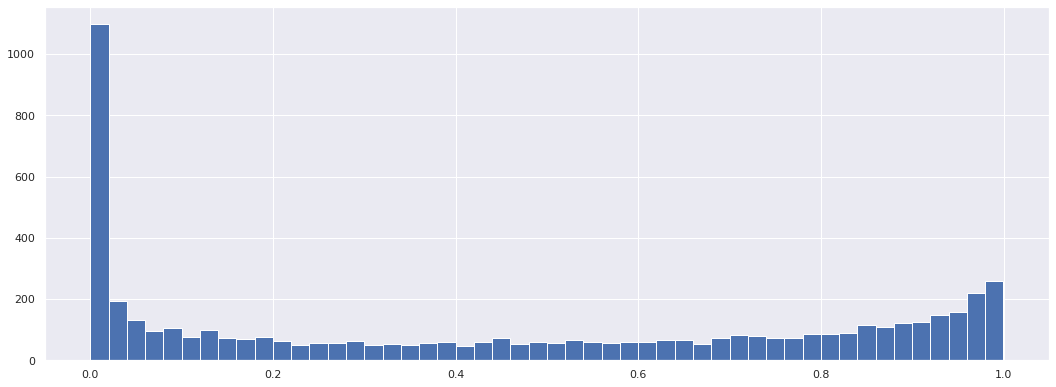

In [0]:
sns.set()
plt.hist(sub1['is_related'],bins=50)
plt.show()
# the plot code is referred from https://www.kaggle.com/vaishvik25/blend-of-smiles

<h1> Plotting the distribution graph of each models solution

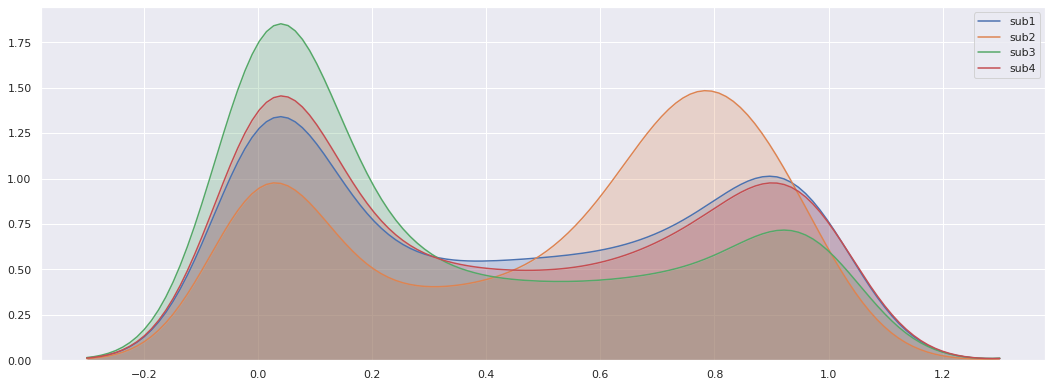

In [0]:
sns.set(rc={'figure.figsize':(18,6.5)})
sns.kdeplot(sub1['is_related'],label="sub1",shade=True,bw=.1)
sns.kdeplot(sub2['is_related'], label="sub2",shade=True,bw=.1)
sns.kdeplot(sub3['is_related'], label="sub3",shade=True,bw=.1)
sns.kdeplot(sub4['is_related'], label="sub4",shade=True,bw=.1)
# sns.kdeplot(sub5['is_related'], label="sub5",shade=True,bw=.1)
# the plot code is referred from https://www.kaggle.com/vaishvik25/blend-of-smiles

Here Model 2 and Model 3 solutions are very different 

<h1>Blending the solution of best 4 models

In [0]:
temp['is_related'] = 0.34*sub1['is_related'] + 0.22*sub3['is_related'] + 0.22*sub4['is_related'] + 0.22*sub4['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "a. Ensemble technique of beow 4 models"

100% 247k/247k [00:01<00:00, 191kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.25*sub1['is_related'] + 0.25*sub3['is_related'] + 0.25*sub4['is_related'] + 0.25*sub4['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "b. Ensemble technique of beow 4 models"

100% 247k/247k [00:01<00:00, 152kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.22*sub1['is_related'] + 0.26*sub3['is_related'] + 0.26*sub4['is_related'] + 0.26*sub4['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "ac. Ensemble technique of beow 4 models"

In [0]:
temp['is_related'] = 0.34*sub1['is_related'] + 0.22*sub3['is_related'] + 0.22*sub4['is_related'] + 0.22*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "c. Ensemble technique of beow 4 models"

100% 246k/246k [00:01<00:00, 208kB/s]


In [0]:
temp['is_related'] = 0.25*sub1['is_related'] + 0.25*sub3['is_related'] + 0.25*sub4['is_related'] + 0.25*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "d. Ensemble technique of beow 4 models"

100% 247k/247k [00:01<00:00, 156kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.22*sub1['is_related'] + 0.26*sub3['is_related'] + 0.26*sub4['is_related'] + 0.26*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "e. Ensemble technique of beow 4 models"

100% 247k/247k [00:01<00:00, 178kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.22*sub1['is_related'] + 0.27*sub3['is_related'] + 0.25*sub4['is_related'] + 0.26*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "f. Ensemble technique of beow 4 models"

100% 246k/246k [00:01<00:00, 178kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.22*sub1['is_related'] + 0.25*sub3['is_related'] + 0.28*sub4['is_related'] + 0.26*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "g. Ensemble technique of beow 4 models"

100% 246k/246k [00:01<00:00, 161kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

In [0]:
temp['is_related'] = 0.22*sub1['is_related'] + 0.25*sub3['is_related'] + 0.28*sub4['is_related'] + 0.25*sub2['is_related'] 
temp.to_csv('submission1.csv', index=False )

In [0]:
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission1.csv -m "h. Ensemble technique of beow 4 models"

100% 246k/246k [00:01<00:00, 226kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild

<H1>After adding the 5th model

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sub1 = pd.read_csv('submission1.csv')
sub2 = pd.read_csv('submission2.csv')
sub3 = pd.read_csv('submission3.csv')
sub4 = pd.read_csv('submission4.csv')
sub5 = pd.read_csv('submission5.csv')

temp = pd.read_csv('submission5.csv')

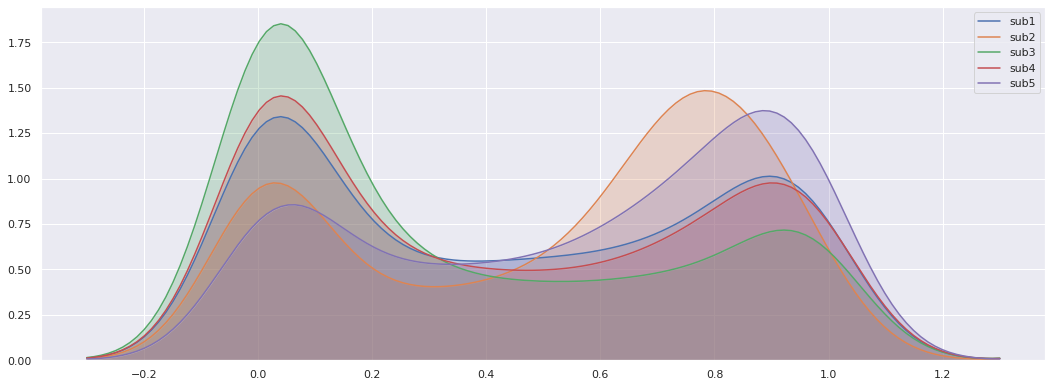

In [4]:
sns.set(rc={'figure.figsize':(18,6.5)})
sns.kdeplot(sub1['is_related'],label="sub1",shade=True,bw=.1)
sns.kdeplot(sub2['is_related'], label="sub2",shade=True,bw=.1)
sns.kdeplot(sub3['is_related'], label="sub3",shade=True,bw=.1)
sns.kdeplot(sub4['is_related'], label="sub4",shade=True,bw=.1)
sns.kdeplot(sub5['is_related'],label="sub5",shade=True,bw=.1)
# the plot code is referred from https://www.kaggle.com/vaishvik25/blend-of-smiles

In [10]:
temp['is_related'] = 0.18*sub1['is_related'] + 0.18*sub3['is_related'] + 0.28*sub4['is_related'] + 0.18*sub2['is_related'] + \
                    0.18*sub5['is_related'] 
temp.to_csv('submission.csv', index=False )
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission.csv -m "a. Ensemble technique After adding model 5"

100% 246k/246k [00:00<00:00, 801kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild


In [11]:
temp['is_related'] = 0.20*sub1['is_related'] + 0.20*sub3['is_related'] + 0.20*sub4['is_related'] + 0.20*sub2['is_related'] + \
                    0.20*sub5['is_related'] 
temp.to_csv('submission.csv', index=False )
!kaggle competitions submit -c recognizing-faces-in-the-wild -f submission.csv -m "a. Ensemble technique After adding model 5"

100% 246k/246k [00:00<00:00, 691kB/s]
Successfully submitted to Northeastern SMILE Lab - Recognizing Faces in the Wild


<H1>Conclusion</h1>

1. Out of above submissions e,g,h Enemble techniques are best and got the same
2. with the a. Ensemble technique After adding model 5 i was able to get 0.911 score.
